                                    Marketing Analytics
                                           For 
                              E-Commerce Market Place Company

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_customers = pd.read_csv("C:/Users/91971/Downloads/Python Foundation End to End Case Study E-Commerce Analytics Project/CUSTOMERS.csv")
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh


In [3]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
df_customers["customer_unique_id"].value_counts().count()

96096

In [5]:
df_customers["customer_unique_id"].duplicated().sum()

3345

In [6]:
df_geolocation = pd.read_csv("C:/Users/91971/Downloads/Python Foundation End to End Case Study E-Commerce Analytics Project/GEO_LOCATION.csv")
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh
...,...,...,...,...,...
19010,99955,-28.107588,-52.144019,Ghaziabad,Uttar Pradesh
19011,99970,-28.345143,-51.876926,Vadugapatti,Tamil Nadu
19012,99910,-27.863500,-52.084760,Akkarampalle,Andhra Pradesh
19013,99920,-27.858716,-52.300403,Kolkata,West Bengal


In [7]:
df_order_items = pd.read_csv("C:/Users/91971/Downloads/Python Foundation End to End Case Study E-Commerce Analytics Project/ORDER_ITEMS.csv")
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72


In [8]:
df_order_payments = pd.read_csv("C:/Users/91971/Downloads/Python Foundation End to End Case Study E-Commerce Analytics Project/ORDER_PAYMENTS.csv")
df_order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [9]:
df_order_review_ratings = pd.read_csv("C:/Users/91971/Downloads/Python Foundation End to End Case Study E-Commerce Analytics Project/ORDER_review_ratings.csv")
df_order_review_ratings

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26
...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,12/9/2017 0:00,12/11/2017 20:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,3/22/2018 0:00,3/23/2018 9:10
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,7/1/2018 0:00,7/2/2018 12:59
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,12/15/2017 0:00,12/16/2017 1:29


In [10]:
df_orders = pd.read_csv("C:/Users/91971/Downloads/Python Foundation End to End Case Study E-Commerce Analytics Project/ORDERS.csv")
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00


In [11]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
df_orders["customer_id"].value_counts().count()

99441

In [13]:
df_products = pd.read_csv("C:/Users/91971/Downloads/Python Foundation End to End Case Study E-Commerce Analytics Project/PRODUCTS.csv")
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture_Decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction_Tools_Lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Bed_Bath_Table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,Computers_Accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [14]:
df_sellers = pd.read_csv("C:/Users/91971/Downloads/Python Foundation End to End Case Study E-Commerce Analytics Project/SELLERS.csv")
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,Kalan Wali,Haryana
3091,f8201cab383e484733266d1906e2fdfa,88137,Bopal,Gujarat
3092,74871d19219c7d518d0090283e03c137,4650,Akkarampalle,Andhra Pradesh
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,Ekambara kuppam,Andhra Pradesh


In [15]:
df_sellers.seller_id.value_counts().count()
# we have 3095 sellers

3095

Q1. Perform Detailed exploratory analysis


a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total 
products, Total categories, Total sellers, Total locations, Total channels, Total 
payment methods etc…) 

In [16]:
#Q1 Calculating Total revenue first-
df_order_items.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
df_order_items["order_item_id"].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
20        3
16        3
17        3
18        3
19        3
21        1
Name: order_item_id, dtype: int64

In [18]:
df_order_items['revenue'] = df_order_items["order_item_id"] * df_order_items["price"]

In [19]:
df_order_items.tail(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,11/3/2017 2:55,55.00,34.19,55.00
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,11/3/2017 2:55,55.00,34.19,110.00
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,11/3/2017 2:55,55.00,34.19,165.00
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,11/3/2017 2:55,55.00,34.19,220.00
112644,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,6/28/2018 9:58,119.85,20.03,119.85
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41,299.99
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53,350.00
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95,99.90
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72,55.99
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,6/12/2018 17:10,43.00,12.79,43.00


In [20]:
#Total revenue
df_order_items['revenue'].sum()

15397738.61

In [21]:
df_order_items["price"].sum()

13591643.700000003

In [22]:
#Total quantity of item sold
df_order_items["order_item_id"].sum()

134936

In [23]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [24]:
df_products.isna().sum()

product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [25]:
df_products=df_products.dropna()

In [26]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32327 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32327 non-null  object 
 1   product_category_name       32327 non-null  object 
 2   product_name_lenght         32327 non-null  float64
 3   product_description_lenght  32327 non-null  float64
 4   product_photos_qty          32327 non-null  float64
 5   product_weight_g            32327 non-null  float64
 6   product_length_cm           32327 non-null  float64
 7   product_height_cm           32327 non-null  float64
 8   product_width_cm            32327 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [27]:
#Total Products
df_products["product_category_name"].value_counts().sum()

32327

In [28]:
#Total category of Products
df_products["product_category_name"].value_counts().count()
#So Total category of product is 71


71

In [29]:
#Total Sellers
df_sellers["seller_id"].value_counts().count()


3095

In [30]:
#Total Location
df_customers["customer_city"].value_counts().count()



4119

In [31]:
#Total seller city
df_sellers["seller_city"].value_counts().count()

534

In [32]:
#Total Payment Methods
df_order_payments["payment_type"].value_counts()
# So Total Payment Methods is 4(for 3 transactions payment method is not defined)

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

b. Understanding how many new customers acquired every month

In [33]:
df_customer_order_detail = pd.merge(left=df_customers,right=df_orders,on="customer_id")
df_customer_order_detail

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,1/12/2018 20:48,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5/19/2018 16:07,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,3/13/2018 16:06,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,7/29/2018 9:51,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,4/7/2018 15:48,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,4/4/2018 8:20,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,4/8/2018 20:11,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,11/3/2017 21:08,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00


In [34]:
#changing date from object to date time
df_customer_order_detail["order_purchase_timestamp"]=df_customer_order_detail["order_purchase_timestamp"].apply(lambda x:pd.to_datetime(x))

In [35]:
df_customer_order_detail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  object        
 9   order_delivered_carrier_date   97658 non-null  object        
 10  order_delivered_customer_date  96476 non-null  object        
 11  order_estimated

In [36]:
df_customer_order_detail["order_purchase_timestamp_MonthYear"]=df_customer_order_detail["order_purchase_timestamp"].dt.to_period('M')

In [37]:
df_customer_order_detail

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_MonthYear
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00,2018-04
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00,2018-04
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00,2018-04
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00,2017-11


In [38]:
df_customer_order_detail.sort_values('order_purchase_timestamp_MonthYear',ascending = True)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_MonthYear
84697,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,Dholka,Gujarat,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:00,10/7/2016 13:18,10/18/2016 13:14,NaN,10/20/2016 0:00,2016-09
21125,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,Kandukur,Andhra Pradesh,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:00,9/15/2016 12:16,11/7/2016 17:11,11/9/2016 7:47,10/4/2016 0:00,2016-09
70561,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,Tuni,Andhra Pradesh,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:00,10/7/2016 13:17,NaN,NaN,10/28/2016 0:00,2016-09
84845,622e13439d6b5a0b486c435618b2679e,009b0127b727ab0ba422f6d9604487c7,12244,Bobbili,Andhra Pradesh,809a282bbd5dbcabb6f2f724fca862ec,canceled,2016-09-13 15:24:00,10/7/2016 13:16,NaN,NaN,9/30/2016 0:00,2016-09
77451,cee53b7d3dd56da687a4fa61c6ce8d32,4403513209514871ac9d0fd681f7cdb5,6703,Naspur,Andhra Pradesh,1069874467b6a425853288c450f68fc9,delivered,2016-10-07 22:51:00,10/7/2016 23:13,10/11/2016 23:13,10/28/2016 13:51,11/29/2016 0:00,2016-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50487,ead83a4f8f7be8c3034b2e98754a6147,230a1e9f42924d41f37fd22a1d4a9707,6540,Khajoori Khas,Delhi,4d59cc2a2e7bb6c0a851725f5888a9b5,canceled,2018-09-06 14:50:00,NaN,NaN,NaN,9/21/2018 0:00,2018-09
75902,bf6181a85bbb4115736c0a8db1a53be3,634420a0ea42302205032ed44ac7fccc,27175,Tallapalle,Andhra Pradesh,616fa7d4871b87832197b2a137a115d2,canceled,2018-10-01 15:30:00,NaN,NaN,NaN,10/23/2018 0:00,2018-10
68312,4c2ec60c29d10c34bd49cb88aa85cfc4,af5454198a97379394cacf676e1e96cb,11900,Sukhrali,Haryana,a2ac6dad85cf8af5b0afb510a240fe8c,canceled,2018-10-03 18:55:00,NaN,NaN,NaN,10/16/2018 0:00,2018-10
85415,a4b417188addbc05b26b72d5e44837a1,87ab9fec999db8bd5774917de3cdf01c,18077,Bade Bacheli,Chhattisgarh,10a045cdf6a5650c21e9cfeb60384c16,canceled,2018-10-17 17:30:00,NaN,NaN,NaN,10/30/2018 0:00,2018-10


In [39]:
df_customer_order_detail_min=df_customer_order_detail.groupby(["customer_unique_id"])[["order_purchase_timestamp_MonthYear"]].min()
df_customer_order_detail_min

,order_purchase_timestamp_MonthYear
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
0000f46a3911fa3c0805444483337064,2017-03
0000f6ccb0745a6a4b88665a16c9f078,2017-10
0004aac84e0df4da2b147fca70cf8255,2017-11
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2017-06
fffea47cd6d3cc0a88bd621562a9d061,2017-12
ffff371b4d645b6ecea244b27531430a,2017-02


In [40]:
df_customer_order_detail_new = pd.merge(left=df_customer_order_detail,right=df_customer_order_detail_min,on="customer_unique_id")
df_customer_order_detail_new

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_MonthYear_x,order_purchase_timestamp_MonthYear_y
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,2017-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,2018-01,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,2018-05,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,2018-03,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,2018-07,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00,2018-04,2018-04
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00,2018-04,2018-04
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00,2018-04,2018-04
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00,2017-11,2017-11


In [41]:
df_customer_order_detail_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   customer_id                           99441 non-null  object        
 1   customer_unique_id                    99441 non-null  object        
 2   customer_zip_code_prefix              99441 non-null  int64         
 3   customer_city                         99441 non-null  object        
 4   customer_state                        99441 non-null  object        
 5   order_id                              99441 non-null  object        
 6   order_status                          99441 non-null  object        
 7   order_purchase_timestamp              99441 non-null  datetime64[ns]
 8   order_approved_at                     99281 non-null  object        
 9   order_delivered_carrier_date          97658 non-null  object        
 10

In [42]:
df_customer_order_detail.order_purchase_timestamp_MonthYear.min()

Period('2016-09', 'M')

In [43]:
df_customer_order_detail.order_purchase_timestamp_MonthYear

0        2017-05
1        2018-01
2        2018-05
3        2018-03
4        2018-07
          ...   
99436    2018-04
99437    2018-04
99438    2018-04
99439    2017-11
99440    2017-12
Name: order_purchase_timestamp_MonthYear, Length: 99441, dtype: period[M]

In [44]:
df_customer_order_detail['customer_unique_id'].unique()

array(['861eff4711a542e4b93843c6dd7febb0',
       '290c77bc529b7ac935b93aa66c333dc3',
       '060e732b5b29e8181a18229c7b0b2b5e', ...,
       'e9f50caf99f032f0bf3c55141f019d99',
       '73c2643a0a458b49f58cea58833b192e',
       '84732c5050c01db9b23e19ba39899398'], dtype=object)

In [45]:
df_customer_order_detail['customer_unique_id'].duplicated().sum()

3345

In [46]:
df_customer_order_detail['order_purchase_timestamp_MonthYear']

0        2017-05
1        2018-01
2        2018-05
3        2018-03
4        2018-07
          ...   
99436    2018-04
99437    2018-04
99438    2018-04
99439    2017-11
99440    2017-12
Name: order_purchase_timestamp_MonthYear, Length: 99441, dtype: period[M]

In [47]:
df_customer_order_detail_new[df_customer_order_detail_new['customer_unique_id'].duplicated() == True]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_MonthYear_x,order_purchase_timestamp_MonthYear_y
6,802bb9a59876a712f8380da8f297057c,4c93744516667ad3b8f1fb645a3116a4,89253,Amadalavalasa,Andhra Pradesh,98b737f8bd00d73d9f61f7344aadf717,delivered,2017-10-15 12:44:00,10/15/2017 13:05,10/17/2017 20:05,10/25/2017 17:00,11/8/2017 0:00,2017-10,2017-09
10,386e96046ce0e77e5c9a9a4e818da93c,1175e95fb47ddff9de6b2b06188f7e0d,81560,Anakapalle,Andhra Pradesh,7845a2492ab1b4f2cf3d56c7b8da1446,delivered,2018-01-18 12:35:00,1/18/2018 12:56,1/18/2018 23:42,1/23/2018 21:51,2/9/2018 0:00,2018-01,2018-01
16,8ef1ad0f471589d02f59c9d914b030e1,295c05e81917928d76245e842748184d,5704,Akkarampalle,Andhra Pradesh,cf5e115a19c54f0457aa4c00fb88ae63,delivered,2018-06-06 11:59:00,6/6/2018 12:12,6/6/2018 17:28,6/12/2018 17:08,7/13/2018 0:00,2018-06,2018-03
36,8d4093a730c51098399f993544697e73,e9dd12dca17352644a959d9dea133935,42800,Bollaram,Andhra Pradesh,f916cacb752116d552d42759c8da0cca,delivered,2018-03-05 18:12:00,3/5/2018 18:30,3/8/2018 0:58,5/4/2018 20:28,3/28/2018 0:00,2018-03,2018-03
38,f0c0ed957add2cc4abeb60ade9ad6d19,e079b18794454de9d2be5c12b4392294,27525,Bugganipalle,Andhra Pradesh,7e3fefb35b0b1d765a343618ca5d454c,delivered,2017-06-14 18:52:00,6/16/2017 6:55,6/22/2017 8:11,6/24/2017 9:13,7/7/2017 0:00,2017-06,2017-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95383,fd7bd57164ba6a5dd0d9e6b9b92a67ec,574e36a816bf7a295404e686062fc0de,12220,Bobbili,Andhra Pradesh,325c8590cc232d3faa8e49c293e7ea2c,delivered,2017-06-06 17:00:00,6/6/2017 17:50,6/7/2017 16:10,6/9/2017 14:27,6/20/2017 0:00,2017-06,2017-06
95833,9e38a0715d956ca6c48e44feb01e3c00,76f7d40948174f5cde0fcf8e6147b59d,7194,Bestavaripeta,Andhra Pradesh,b95ee76467f40a43ca737b18839d83d6,delivered,2018-04-29 22:59:00,5/1/2018 5:55,5/3/2018 13:19,5/4/2018 20:28,5/17/2018 0:00,2018-04,2017-12
96301,3fa57a1801314f5064ffebcc14d2063b,88fcb680dc8cd2e540010c0750b78242,13348,Mehmand,Chhattisgarh,00772b2af35643653f108fdac1155ee3,delivered,2017-04-24 10:53:00,4/24/2017 11:05,4/24/2017 11:15,5/6/2017 11:48,5/12/2017 0:00,2017-04,2017-04
96729,56f1622201c6d8b17b1bc57367841538,2dcbfb99d95c7ba6eb992a98627f45b8,4890,Akkarampalle,Andhra Pradesh,ce5f998d724ed1ac61c890e33b24a33f,delivered,2017-11-28 01:16:00,11/28/2017 1:36,11/29/2017 18:54,12/2/2017 18:04,12/18/2017 0:00,2017-11,2017-11


In [49]:
df_customer_order_detail_new["User_type"]="New"
df_customer_order_detail_new.loc[df_customer_order_detail_new['order_purchase_timestamp_MonthYear_x']>df_customer_order_detail_new['order_purchase_timestamp_MonthYear_y'],"User_type"]="Existing"

In [50]:
df_customer_order_detail_new[df_customer_order_detail_new["User_type"]=="Existing"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_MonthYear_x,order_purchase_timestamp_MonthYear_y,User_type
6,802bb9a59876a712f8380da8f297057c,4c93744516667ad3b8f1fb645a3116a4,89253,Amadalavalasa,Andhra Pradesh,98b737f8bd00d73d9f61f7344aadf717,delivered,2017-10-15 12:44:00,10/15/2017 13:05,10/17/2017 20:05,10/25/2017 17:00,11/8/2017 0:00,2017-10,2017-09,Existing
16,8ef1ad0f471589d02f59c9d914b030e1,295c05e81917928d76245e842748184d,5704,Akkarampalle,Andhra Pradesh,cf5e115a19c54f0457aa4c00fb88ae63,delivered,2018-06-06 11:59:00,6/6/2018 12:12,6/6/2018 17:28,6/12/2018 17:08,7/13/2018 0:00,2018-06,2018-03,Existing
35,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,Bollaram,Andhra Pradesh,19c0c76962278b152cc44fc63ffd5e48,delivered,2018-04-18 09:42:00,4/18/2018 9:55,4/20/2018 18:52,5/17/2018 20:19,5/18/2018 0:00,2018-04,2018-03,Existing
95,5c4fbfda89ecf784397c5a99ec36601a,7a380cb5434e6b6b5b37d45bb99dbe8a,9890,Adoni,Andhra Pradesh,4941da6e1a4eef723674c7148152c4f6,delivered,2018-06-11 16:49:00,6/12/2018 4:57,6/12/2018 15:05,6/13/2018 18:39,6/26/2018 0:00,2018-06,2018-05,Existing
124,fe6d73ac006153a398439253006e5adc,60f874c577dc096ecd52bd0bf6bd5942,36780,Kaghaznagar,Andhra Pradesh,e99f27b73c1fb9070310e00d081d3c96,delivered,2018-04-17 09:48:00,4/17/2018 10:55,4/17/2018 22:58,4/25/2018 22:16,5/8/2018 0:00,2018-04,2018-02,Existing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95382,d489b58e4d66d84eddc981c68c83b4f4,574e36a816bf7a295404e686062fc0de,12220,Bobbili,Andhra Pradesh,25c0762610a416a21571e4ab3cf179b8,delivered,2018-04-26 18:07:00,4/26/2018 18:31,4/30/2018 16:03,5/2/2018 16:42,5/11/2018 0:00,2018-04,2017-06,Existing
95833,9e38a0715d956ca6c48e44feb01e3c00,76f7d40948174f5cde0fcf8e6147b59d,7194,Bestavaripeta,Andhra Pradesh,b95ee76467f40a43ca737b18839d83d6,delivered,2018-04-29 22:59:00,5/1/2018 5:55,5/3/2018 13:19,5/4/2018 20:28,5/17/2018 0:00,2018-04,2017-12,Existing
96300,ff1566bb6758a1a457e922cd7affcb2e,88fcb680dc8cd2e540010c0750b78242,13348,Mehmand,Chhattisgarh,eda613a4e8989dac08362e3326431eaa,delivered,2018-01-19 08:02:00,1/19/2018 8:15,1/22/2018 18:59,2/2/2018 15:42,2/16/2018 0:00,2018-01,2017-04,Existing
96728,c590510c46287c15188b2263bd0bdc1c,2dcbfb99d95c7ba6eb992a98627f45b8,4890,Akkarampalle,Andhra Pradesh,4035b52134bcb1bdaf305b4671495372,delivered,2017-12-03 20:37:00,12/3/2017 20:55,12/5/2017 20:48,12/13/2017 20:09,12/26/2017 0:00,2017-12,2017-11,Existing


In [51]:
df_customer_order_detail_new[df_customer_order_detail_new["User_type"]=="New"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_MonthYear_x,order_purchase_timestamp_MonthYear_y,User_type
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,2017-05,2017-05,New
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,2018-01,2018-01,New
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,2018-05,2018-05,New
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,2018-03,2018-03,New
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,2018-07,2018-07,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00,2018-04,2018-04,New
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00,2018-04,2018-04,New
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00,2018-04,2018-04,New
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00,2017-11,2017-11,New


In [52]:
df_customer_order_detail_new[df_customer_order_detail_new["customer_unique_id"]=="4c93744516667ad3b8f1fb645a3116a4"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_MonthYear_x,order_purchase_timestamp_MonthYear_y,User_type
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,Amadalavalasa,Andhra Pradesh,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:00,9/14/2017 18:25,9/18/2017 21:27,9/28/2017 17:32,10/4/2017 0:00,2017-09,2017-09,New
6,802bb9a59876a712f8380da8f297057c,4c93744516667ad3b8f1fb645a3116a4,89253,Amadalavalasa,Andhra Pradesh,98b737f8bd00d73d9f61f7344aadf717,delivered,2017-10-15 12:44:00,10/15/2017 13:05,10/17/2017 20:05,10/25/2017 17:00,11/8/2017 0:00,2017-10,2017-09,Existing


c. Understand the retention of customers on month on month basis


In [53]:
c=df_customer_order_detail_new.groupby(["order_purchase_timestamp_MonthYear_x","User_type"])[["User_type"]].count()
c

User_type
order_purchase_timestamp_MonthYear_x User_type           
2016-09                              New                4
2016-10                              New              324
2016-12                              New                1
2017-01                              Existing           1
                                     New              799
2017-02                              Existing           3
                                     New             1777
2017-03                              Existing           6
                                     New             2676
2017-04                              Existing          21
                                     New             2383
2017-05                              Existing          30
                                     New             3670
2017-06                              Existing          45
                                     New             3200
2017-07                              Existing          57
                                     New             3969
2017-08                              Existing          65
                                     New             4266
2017-09                              Existing          83
                                     New             4202
2017-10                              Existing          96
                                     New             4535
2017-11                              Existing         132
                                     New             7412
2017-12                              Existing         122
                                     New             5551
2018-01                              Existing         145
                                     New             7124
2018-02                              Existing         126
                                     New             6602
2018-03                              Existing         155
                                     New             7056
2018-04                              Existing         174
                                     New             6765
2018-05                              Existing         198
                                     New             6675
2018-06                              Existing         193
                                     New             5974
2018-07                              Existing         161
                                     New             6131
2018-08                              Existing         196
                                     New             6316
2018-09                              Existing          11
                                     New                5
2018-10                              Existing           3
                                     New                1

In [54]:
d=c.groupby(["order_purchase_timestamp_MonthYear_x"])[["User_type"]].sum()
d


,User_type
order_purchase_timestamp_MonthYear_x,
2016-09,4
2016-10,324
2016-12,1
2017-01,800
2017-02,1780
2017-03,2682
2017-04,2404
2017-05,3700
2017-06,3245


d. How the revenues from existing/new customers on month on month basis

In [55]:
#Qd
df_customer_order_items = pd.merge(left=df_customer_order_detail_new,right=df_order_items,on="order_id")
df_customer_order_items

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_purchase_timestamp_MonthYear_x,order_purchase_timestamp_MonthYear_y,User_type,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,2017-05,2017-05,New,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,...,2018-01,2018-01,New,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,...,2018-05,2018-05,New,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,...,2018-03,2018-03,New,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,...,2018-07,2018-07,New,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25,230.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,...,2018-04,2018-04,New,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,4/12/2018 16:08,74.90,13.88,74.90
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,...,2018-04,2018-04,New,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,4/10/2018 8:35,114.90,14.16,114.90
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,...,2018-04,2018-04,New,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,4/12/2018 20:30,37.00,19.04,37.00
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,...,2017-11,2017-11,New,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,11/9/2017 21:15,689.00,22.07,689.00


In [56]:
month_revenue_relation=df_customer_order_items.groupby(["User_type","order_purchase_timestamp_MonthYear_x"])[["revenue"]].sum()
month_revenue_relation

revenue
User_type order_purchase_timestamp_MonthYear_x            
Existing  2017-01                                    10.90
          2017-02                                   124.92
          2017-03                                   561.27
          2017-04                                  2382.84
          2017-05                                  5166.82
          2017-06                                  5583.70
          2017-07                                 10742.68
          2017-08                                 11778.02
          2017-09                                 11750.30
          2017-10                                 14431.56
          2017-11                                 18246.05
          2017-12                                 18582.91
          2018-01                                 21297.86
          2018-02                                 17508.25
          2018-03                                 23627.55
          2018-04                                 28743.69
          2018-05                                 27573.10
          2018-06                                 29876.42
          2018-07                                 24179.15
          2018-08                                 21508.48
          2018-09                                   145.00
New       2016-09                                   435.23
          2016-10                                 56103.79
          2016-12                                    10.90
          2017-01                                142066.40
          2017-02                                269661.74
          2017-03                                411455.16
          2017-04                                396953.95
          2017-05                                557221.27
          2017-06                                466065.02
          2017-07                                547292.92
          2017-08                                643557.67
          2017-09                                742139.96
          2017-10                                751727.92
          2017-11                               1158179.02
          2017-12                                796459.82
          2018-01                               1051402.05
          2018-02                                955563.66
          2018-03                               1085439.17
          2018-04                               1102172.43
          2018-05                               1109844.14
          2018-06                                945207.59
          2018-07                                987803.04
          2018-08                                927154.29

e. Understand the trends/seasonality of sales, quantity by category, location, month, 
week, day, time, channel, payment method etc…


In [59]:
month_revenue_relation_new=df_customer_order_items.groupby(["order_purchase_timestamp_MonthYear_x"])[["revenue"]].sum()
month_revenue_relation_new

,revenue
order_purchase_timestamp_MonthYear_x,
2016-09,435.23
2016-10,56103.79
2016-12,10.90
2017-01,142077.30
2017-02,269786.66
2017-03,412016.43
2017-04,399336.79
2017-05,562388.09
2017-06,471648.72


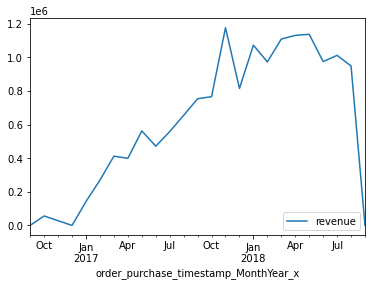

In [60]:
month_revenue_relation_new.plot(kind='line')
plt.legend(loc='lower right')
plt.show()

In [61]:
month_quantity_relation=df_customer_order_items.groupby(["order_purchase_timestamp_MonthYear_x"])[["order_item_id"]].sum()
month_quantity_relation

,order_item_id
order_purchase_timestamp_MonthYear_x,
2016-09,10
2016-10,457
2016-12,1
2017-01,1318
2017-02,2252
2017-03,3515
2017-04,3094
2017-05,4802
2017-06,4094


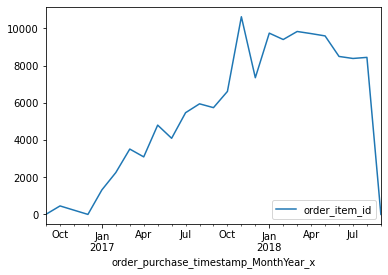

In [62]:

month_quantity_relation.plot(kind='line')
plt.legend(loc='lower right')
plt.show()

In [63]:
state_order_relation=df_customer_order_items.groupby(["customer_state"])[["order_item_id"]].sum()
state_order_relation

,order_item_id
customer_state,
Andhra Pradesh,83352
Arunachal Pradesh,1525
Chhattisgarh,8339
Delhi,4426
Goa,10
Gujarat,10230
Haryana,3002
Himachal Pradesh,980
Jammu & Kashmir,2148


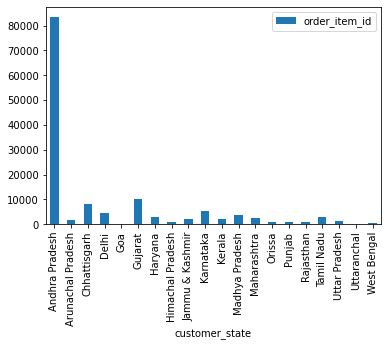

In [64]:

state_order_relation.plot(kind='bar')
plt.legend(loc='upper right')
plt.show()

In [65]:
df_customer_order_payment = pd.merge(left=df_customer_order_items,right=df_order_payments,on="order_id")
df_customer_order_payment

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88,124.99,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,...,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48,289.00,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,...,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79,139.94,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,...,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36,149.94,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,...,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25,230.00,1,credit_card,8,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,...,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,4/12/2018 16:08,74.90,13.88,74.90,1,credit_card,6,88.78
117597,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,...,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,4/10/2018 8:35,114.90,14.16,114.90,1,credit_card,3,129.06
117598,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,...,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,4/12/2018 20:30,37.00,19.04,37.00,1,credit_card,5,56.04
117599,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,...,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,11/9/2017 21:15,689.00,22.07,689.00,1,credit_card,2,711.07


In [66]:
payment_type_order_relation=df_customer_order_payment.groupby(["payment_type"])[["order_item_id"]].sum()
payment_type_order_relation

,order_item_id
payment_type,
UPI,28640
credit_card,102941
debit_card,1953
voucher,7105


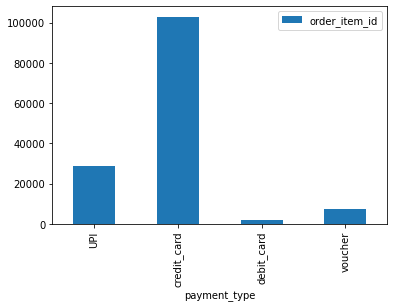

In [67]:
payment_type_order_relation.plot(kind='bar')
plt.legend(loc='upper right')
plt.show()

In [68]:
df_customer_order_items["order_purchase_timestamp_WeekYear"]=df_customer_order_items["order_purchase_timestamp"].dt.to_period('W')
df_customer_order_items

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_purchase_timestamp_MonthYear_y,User_type,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,order_purchase_timestamp_WeekYear
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,2017-05,New,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88,124.99,2017-05-15/2017-05-21
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,...,2018-01,New,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48,289.00,2018-01-08/2018-01-14
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,...,2018-05,New,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79,139.94,2018-05-14/2018-05-20
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,...,2018-03,New,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36,149.94,2018-03-12/2018-03-18
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,...,2018-07,New,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25,230.00,2018-07-23/2018-07-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,...,2018-04,New,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,4/12/2018 16:08,74.90,13.88,74.90,2018-04-02/2018-04-08
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,...,2018-04,New,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,4/10/2018 8:35,114.90,14.16,114.90,2018-04-02/2018-04-08
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,...,2018-04,New,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,4/12/2018 20:30,37.00,19.04,37.00,2018-04-02/2018-04-08
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,...,2017-11,New,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,11/9/2017 21:15,689.00,22.07,689.00,2017-10-30/2017-11-05


In [69]:
week_order_relation=df_customer_order_items.groupby(["order_purchase_timestamp_WeekYear"])[["order_item_id"]].sum()
week_order_relation

,order_item_id
order_purchase_timestamp_WeekYear,
2016-08-29/2016-09-04,3
2016-09-05/2016-09-11,1
2016-09-12/2016-09-18,6
2016-09-26/2016-10-02,1
2016-10-03/2016-10-09,412
...,...
2018-08-06/2018-08-12,2717
2018-08-13/2018-08-19,2337
2018-08-20/2018-08-26,1377


In [70]:
df_customer_order_items["week_number"]=df_customer_order_items["order_purchase_timestamp"].apply(lambda x:x.weekofyear)
df_customer_order_items

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,User_type,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,order_purchase_timestamp_WeekYear,week_number
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,New,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88,124.99,2017-05-15/2017-05-21,20
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,...,New,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48,289.00,2018-01-08/2018-01-14,2
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,...,New,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79,139.94,2018-05-14/2018-05-20,20
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,...,New,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36,149.94,2018-03-12/2018-03-18,11
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,...,New,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25,230.00,2018-07-23/2018-07-29,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,...,New,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,4/12/2018 16:08,74.90,13.88,74.90,2018-04-02/2018-04-08,14
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,...,New,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,4/10/2018 8:35,114.90,14.16,114.90,2018-04-02/2018-04-08,14
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,...,New,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,4/12/2018 20:30,37.00,19.04,37.00,2018-04-02/2018-04-08,14
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,...,New,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,11/9/2017 21:15,689.00,22.07,689.00,2017-10-30/2017-11-05,44


In [71]:
df_customer_order_items["month_number"]=df_customer_order_items["order_purchase_timestamp"].apply(lambda x:x.month)
df_customer_order_items

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,order_purchase_timestamp_WeekYear,week_number,month_number
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88,124.99,2017-05-15/2017-05-21,20,5
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,...,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48,289.00,2018-01-08/2018-01-14,2,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,...,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79,139.94,2018-05-14/2018-05-20,20,5
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,...,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36,149.94,2018-03-12/2018-03-18,11,3
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,...,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25,230.00,2018-07-23/2018-07-29,30,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,...,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,4/12/2018 16:08,74.90,13.88,74.90,2018-04-02/2018-04-08,14,4
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,...,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,4/10/2018 8:35,114.90,14.16,114.90,2018-04-02/2018-04-08,14,4
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,...,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,4/12/2018 20:30,37.00,19.04,37.00,2018-04-02/2018-04-08,14,4
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,...,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,11/9/2017 21:15,689.00,22.07,689.00,2017-10-30/2017-11-05,44,11


In [72]:
df_customer_order_items["year_number"]=df_customer_order_items["order_purchase_timestamp"].apply(lambda x:x.year)
df_customer_order_items

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,order_purchase_timestamp_WeekYear,week_number,month_number,year_number
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88,124.99,2017-05-15/2017-05-21,20,5,2017
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,...,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48,289.00,2018-01-08/2018-01-14,2,1,2018
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,...,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79,139.94,2018-05-14/2018-05-20,20,5,2018
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,...,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36,149.94,2018-03-12/2018-03-18,11,3,2018
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,...,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25,230.00,2018-07-23/2018-07-29,30,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,...,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,4/12/2018 16:08,74.90,13.88,74.90,2018-04-02/2018-04-08,14,4,2018
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,...,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,4/10/2018 8:35,114.90,14.16,114.90,2018-04-02/2018-04-08,14,4,2018
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,...,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,4/12/2018 20:30,37.00,19.04,37.00,2018-04-02/2018-04-08,14,4,2018
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,...,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,11/9/2017 21:15,689.00,22.07,689.00,2017-10-30/2017-11-05,44,11,2017


In [73]:
df_customer_order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 26 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   customer_id                           112650 non-null  object        
 1   customer_unique_id                    112650 non-null  object        
 2   customer_zip_code_prefix              112650 non-null  int64         
 3   customer_city                         112650 non-null  object        
 4   customer_state                        112650 non-null  object        
 5   order_id                              112650 non-null  object        
 6   order_status                          112650 non-null  object        
 7   order_purchase_timestamp              112650 non-null  datetime64[ns]
 8   order_approved_at                     112635 non-null  object        
 9   order_delivered_carrier_date          111456 non-null  obje

In [74]:
year_wise_data=df_customer_order_items.groupby(["year_number"])[["order_item_id"]].sum()
year_wise_data

,order_item_id
year_number,
2016,468
2017,60829
2018,73639


In [75]:
week_wise_data=df_customer_order_items.groupby(["year_number","week_number"])[["order_item_id"]].sum()
week_wise_data

order_item_id
year_number week_number               
2016        35                       3
            36                       1
            37                       6
            39                       1
            40                     412
...                                ...
2018        32                    2717
            33                    2337
            34                    1377
            35                     159
            36                       1

[95 rows x 1 columns]

In [76]:
def year_week_order(year_number):
    return df_customer_order_items.loc[(df_customer_order_items.year_number==year_number)].groupby(['year_number','week_number'])[['order_item_id']].sum()

In [77]:
year_number=int(input())


2017


In [78]:
year_week=year_week_order(year_number)
year_week

order_item_id
year_number week_number               
2017        1                       48
            2                      109
            3                      321
            4                      533
            5                      701
            6                      649
            7                      528
            8                      526
            9                      672
            10                     803
            11                     820
            12                     840
            13                     704
            14                     749
            15                     511
            16                     741
            17                     924
            18                     996
            19                    1049
            20                    1210
            21                    1041
            22                    1030
            23                    1083
            24                     992
            25                     854
            26                     885
            27                    1026
            28                    1474
            29                    1307
            30                    1220
            31                    1270
            32                    1247
            33                    1340
            34                    1474
            35                    1336
            36                    1174
            37                    1534
            38                    1370
            39                    1310
            40                    1400
            41                    1438
            42                    1721
            43                    1432
            44                    1374
            45                    1606
            46                    1830
            47                    4378
            48                    2826
            49                    2196
            50                    1874
            51                    1284
            52                    1069

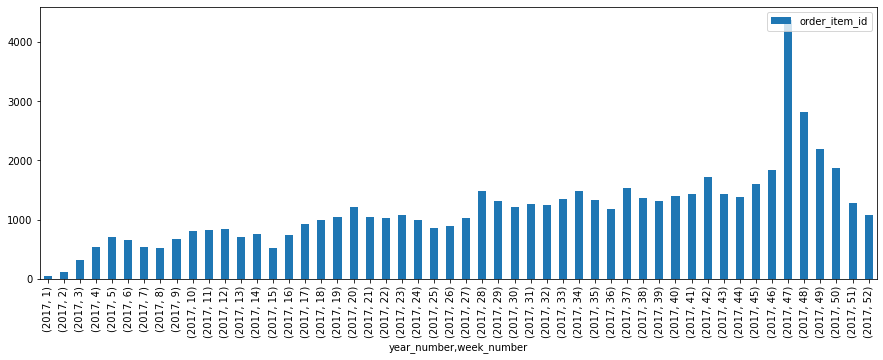

In [79]:
year_week.plot(kind='bar',figsize=(15,5))
plt.legend(loc='upper right')
plt.show()

f. Popular Products by month, seller, state, category.

g. Popular categories by state, month

In [93]:
df_customer_order_payment_product = pd.merge(left=df_customer_order_items,right=df_products,on="product_id")
df_customer_order_payment_product

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,month_number,year_number,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,5,2017,Office_Furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:00,11/10/2017 0:47,11/22/2017 1:43,...,11,2017,Office_Furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:00,11/10/2017 0:47,11/22/2017 1:43,...,11,2017,Office_Furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,Kodala,Orissa,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:00,5/8/2017 22:22,5/19/2017 20:16,...,5,2017,Office_Furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,Anklav,Gujarat,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:00,2/4/2018 22:29,2/19/2018 18:21,...,2,2018,Office_Furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111017,f6c6d3e1e20969a5eed982163f959719,fb354969e06f2093c0083cbfbb91864e,1521,Akkarampalle,Andhra Pradesh,b2f58affcc178fea2daaf834f1acff5e,delivered,2018-07-14 14:08:00,7/17/2018 4:31,7/25/2018 11:18,...,7,2018,Home_Confort,32.0,373.0,1.0,1500.0,45.0,30.0,45.0
111018,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,Akkarampalle,Andhra Pradesh,c8203bb57639618630affac9e8e923dd,delivered,2017-03-27 23:04:00,3/27/2017 23:23,3/28/2017 14:18,...,3,2017,Pet_Shop,43.0,779.0,1.0,300.0,16.0,16.0,16.0
111019,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,Deoranian,Uttar Pradesh,45b3000bcd10464ac178f32cd783fc83,delivered,2017-12-07 23:55:00,12/9/2017 23:50,12/11/2017 20:29,...,12,2017,Health_Beauty,40.0,1694.0,1.0,2400.0,33.0,10.0,16.0
111020,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,Akkarampalle,Andhra Pradesh,49645a8902c1ba980836b7bff991d69f,delivered,2018-04-04 17:50:00,4/4/2018 18:08,4/5/2018 16:36,...,4,2018,Fashion_Bags_Accessories,29.0,498.0,4.0,300.0,16.0,16.0,11.0


In [94]:
df_customer_order_payment_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111022 entries, 0 to 111021
Data columns (total 34 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   customer_id                           111022 non-null  object        
 1   customer_unique_id                    111022 non-null  object        
 2   customer_zip_code_prefix              111022 non-null  int64         
 3   customer_city                         111022 non-null  object        
 4   customer_state                        111022 non-null  object        
 5   order_id                              111022 non-null  object        
 6   order_status                          111022 non-null  object        
 7   order_purchase_timestamp              111022 non-null  datetime64[ns]
 8   order_approved_at                     111008 non-null  object        
 9   order_delivered_carrier_date          109867 non-null  obje

In [95]:
df_customer_order_payment_product.groupby(["customer_state"])[["product_category_name"]].head(50)

,product_category_name
0,Office_Furniture
1,Office_Furniture
2,Office_Furniture
3,Office_Furniture
4,Office_Furniture
...,...
50254,Musical_Instruments
68294,Fashion_Male_Clothing
75009,Telephony
83680,Sports_Leisure


In [96]:
df_customer_order_payment_product.product_category_name.value_counts()

Bed_Bath_Table               11115
Health_Beauty                 9670
Sports_Leisure                8641
Furniture_Decor               8334
Computers_Accessories         7827
                             ...  
Arts_And_Craftmanship           24
La_Cuisine                      14
Cds_Dvds_Musicals               14
Fashion_Childrens_Clothes        8
Security_And_Services            2
Name: product_category_name, Length: 71, dtype: int64

In [97]:
def popular_products(product_category_name):
    return df_customer_order_payment_product.loc[(df_customer_order_payment_product.product_category_name==product_category_name)].groupby(["product_category_name","customer_state","month_number","year_number"])[['revenue']].sum().sort_values('revenue',ascending=False).head(20)

In [98]:
product_category_name=str(input())
customer_state=str(input())





Office_Furniture
Andhra Pradesh


In [99]:
popular_products=popular_products(product_category_name)
popular_products

revenue
product_category_name customer_state  month_number year_number          
Office_Furniture      Andhra Pradesh  3            2018         29716.87
                                      10           2017         28129.83
                                      11           2017         19478.49
                                      5            2018         17817.36
                                      7            2018         16768.88
                                      4            2018         16320.99
                                      1            2018         14936.55
                                      7            2017         14310.85
                                      6            2018         10225.19
                                      3            2017          9632.14
                                      9            2017          8218.05
                                      8            2017          8160.07
                      Jammu & Kashmir 2            2018          8038.38
                      Karnataka       2            2018          7759.34
                      Andhra Pradesh  2            2018          7288.19
                                                   2017          6454.65
                                      4            2017          6271.08
                                      12           2017          6094.13
                      Gujarat         5            2017          5607.55
                      Karnataka       4            2018          5150.45

h. List top 10 most expensive products sorted by price

In [100]:
#Q1 h)
df_customer_order_payment_product.groupby(["product_category_name"])[["price"]].mean().head(10)

,price
product_category_name,
Agro_Industry_And_Commerce,342.124858
Air_Conditioning,185.269226
Art,115.802105
Arts_And_Craftmanship,75.583750
Audio,139.254121
Auto,139.957523
Baby,133.756818
Bed_Bath_Table,93.296327
Books_General_Interest,84.732152


Q2. Performing Customers/sellers Segmentation




b. Divide the sellers into groups based on the revenue generated 

In [102]:
#Q2 a)
(np.percentile(df_customer_order_payment_product.revenue,95))

399.92949999999996

In [103]:
df_customer_order_payment_product.revenue.quantile(0.95)

399.92949999999996

In [104]:
df_customer_order_payment_product["revenue_segmentation"]=np.where((df_customer_order_payment_product.revenue>df_customer_order_payment_product.revenue.quantile(0.75)),"High Revenue",
                                             np.where((df_customer_order_payment_product.revenue>df_customer_order_payment_product.revenue.quantile(0.25)),"Mid Revenue","Low Revenue"))     

In [105]:
df_customer_order_payment_product.tail(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,year_number,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,revenue_segmentation
111012,0b7a30ba373aeb55cf28add5b5477956,8c8173e547e020f411aa55b2fceed861,87145,Manasa,Madhya Pradesh,e12f5458c6b4f349a97fbf22e08d17ac,delivered,2017-08-01 12:57:00,8/2/2017 3:03,8/2/2017 17:47,...,2017,Auto,57.0,651.0,5.0,16700.0,78.0,4.0,47.0,Mid Revenue
111013,0d7da1d5507a67dbb512b53744e775e9,a5ba329297100ea689fa263768b35b8b,95020,Bapatla,Andhra Pradesh,673242a6057d4287cb24379d405cf5ac,delivered,2017-07-15 14:31:00,7/15/2017 14:43,7/18/2017 20:12,...,2017,Furniture_Decor,42.0,378.0,2.0,300.0,30.0,30.0,30.0,Low Revenue
111014,0d7da1d5507a67dbb512b53744e775e9,a5ba329297100ea689fa263768b35b8b,95020,Bapatla,Andhra Pradesh,673242a6057d4287cb24379d405cf5ac,delivered,2017-07-15 14:31:00,7/15/2017 14:43,7/18/2017 20:12,...,2017,Furniture_Decor,42.0,378.0,2.0,300.0,30.0,30.0,30.0,Mid Revenue
111015,de10ff4100545d244951898150f9aad1,64aa56502b9ea3886fb356a259434201,73801,Bilha,Chhattisgarh,925d5a139c3c9f4e3f028685b9a95617,delivered,2018-06-24 19:43:00,6/24/2018 20:16,6/25/2018 17:29,...,2018,Consoles_Games,58.0,1278.0,1.0,200.0,20.0,11.0,16.0,High Revenue
111016,e98998055b4804137a020830903f93f2,e097d846931763789c3fd00b27f3c325,3057,Akkarampalle,Andhra Pradesh,34041ba8694b6808060aafda57f6075e,delivered,2017-03-20 18:33:00,3/20/2017 18:33,3/21/2017 15:07,...,2017,Furniture_Decor,50.0,1342.0,3.0,800.0,25.0,25.0,25.0,Low Revenue
111017,f6c6d3e1e20969a5eed982163f959719,fb354969e06f2093c0083cbfbb91864e,1521,Akkarampalle,Andhra Pradesh,b2f58affcc178fea2daaf834f1acff5e,delivered,2018-07-14 14:08:00,7/17/2018 4:31,7/25/2018 11:18,...,2018,Home_Confort,32.0,373.0,1.0,1500.0,45.0,30.0,45.0,Mid Revenue
111018,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,Akkarampalle,Andhra Pradesh,c8203bb57639618630affac9e8e923dd,delivered,2017-03-27 23:04:00,3/27/2017 23:23,3/28/2017 14:18,...,2017,Pet_Shop,43.0,779.0,1.0,300.0,16.0,16.0,16.0,Low Revenue
111019,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,Deoranian,Uttar Pradesh,45b3000bcd10464ac178f32cd783fc83,delivered,2017-12-07 23:55:00,12/9/2017 23:50,12/11/2017 20:29,...,2017,Health_Beauty,40.0,1694.0,1.0,2400.0,33.0,10.0,16.0,High Revenue
111020,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,Akkarampalle,Andhra Pradesh,49645a8902c1ba980836b7bff991d69f,delivered,2018-04-04 17:50:00,4/4/2018 18:08,4/5/2018 16:36,...,2018,Fashion_Bags_Accessories,29.0,498.0,4.0,300.0,16.0,16.0,11.0,Mid Revenue
111021,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,Jalda,Orissa,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:00,11/14/2017 12:15,11/27/2017 20:44,...,2017,Electronics,33.0,63.0,1.0,6185.0,63.0,11.0,20.0,High Revenue


In [106]:
df_customer_order_payment_product[df_customer_order_payment_product["revenue_segmentation"]=="Low Revenue"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,year_number,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,revenue_segmentation
174,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,Akkarampalle,Andhra Pradesh,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:00,2/19/2018 14:50,2/20/2018 0:03,...,2018,Computers_Accessories,37.0,322.0,3.0,100.0,16.0,3.0,13.0,Low Revenue
175,70a143bf0866aa6c1ba15fab452335a8,305d4defdfe8b3f01c754e700afdc02a,2346,Akkarampalle,Andhra Pradesh,d4bf9a6552dbfc7f1b2f6abbb1028b99,delivered,2018-01-05 09:37:00,1/9/2018 7:24,1/9/2018 17:04,...,2018,Computers_Accessories,37.0,322.0,3.0,100.0,16.0,3.0,13.0,Low Revenue
176,6360554117752d0c465cece6bd0b985e,e2379233130b3a858f6d6c89d84a4646,12246,Bobbili,Andhra Pradesh,d28b5d86a3eed220a736db5a42815270,delivered,2018-01-17 11:56:00,1/17/2018 12:10,1/17/2018 20:57,...,2018,Computers_Accessories,37.0,322.0,3.0,100.0,16.0,3.0,13.0,Low Revenue
177,6360554117752d0c465cece6bd0b985e,e2379233130b3a858f6d6c89d84a4646,12246,Bobbili,Andhra Pradesh,d28b5d86a3eed220a736db5a42815270,delivered,2018-01-17 11:56:00,1/17/2018 12:10,1/17/2018 20:57,...,2018,Computers_Accessories,37.0,322.0,3.0,100.0,16.0,3.0,13.0,Low Revenue
178,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,Anakapalle,Andhra Pradesh,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:00,1/18/2018 12:56,1/18/2018 23:25,...,2018,Toys,58.0,739.0,5.0,350.0,28.0,10.0,12.0,Low Revenue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111009,ec126b0b2593214b75ec14893b15d9e5,78f3a4a5fd7af366fb49942756be9a1d,89300,Chaurai Khas,Madhya Pradesh,afce0ce9c7f274fe0f46591b25e9d438,delivered,2018-02-08 17:41:00,2/10/2018 10:18,2/10/2018 1:17,...,2018,Bed_Bath_Table,24.0,417.0,1.0,300.0,16.0,12.0,11.0,Low Revenue
111010,b928a0080b89749b0b35f574ec9975a9,40eeaec8ded23f98865c1ebdb041f6ea,6216,Nagari,Andhra Pradesh,6ef341a08828373038644f3749b9904e,delivered,2018-02-07 18:58:00,2/8/2018 7:35,2/8/2018 19:43,...,2018,Industry_Commerce_And_Business,54.0,1001.0,1.0,400.0,20.0,20.0,30.0,Low Revenue
111013,0d7da1d5507a67dbb512b53744e775e9,a5ba329297100ea689fa263768b35b8b,95020,Bapatla,Andhra Pradesh,673242a6057d4287cb24379d405cf5ac,delivered,2017-07-15 14:31:00,7/15/2017 14:43,7/18/2017 20:12,...,2017,Furniture_Decor,42.0,378.0,2.0,300.0,30.0,30.0,30.0,Low Revenue
111016,e98998055b4804137a020830903f93f2,e097d846931763789c3fd00b27f3c325,3057,Akkarampalle,Andhra Pradesh,34041ba8694b6808060aafda57f6075e,delivered,2017-03-20 18:33:00,3/20/2017 18:33,3/21/2017 15:07,...,2017,Furniture_Decor,50.0,1342.0,3.0,800.0,25.0,25.0,25.0,Low Revenue


In [107]:
df_customer_order_payment_product.groupby(["revenue_segmentation","seller_id"])[["revenue"]].sum().sort_values("revenue",ascending=False)

revenue
revenue_segmentation seller_id                                  
High Revenue         53243585a1d6dc2643021fd1853d8905  244941.39
                     7c67e1448b00f6e969d365cea6b010ab  226991.52
                     4869f7a5dfa277a7dca6462dcf3b52b2  192845.01
                     fa1c13f2614d7b5c4749cbc52fecda94  181930.80
                     7e93a43ef30c4f03f38b393420bc753a  176892.90
...                                                          ...
Low Revenue          3bfba5a77604f6dfae7e6dd7aaf65821       7.80
                     77128dec4bec4878c37ab7d6169d6f26       6.50
                     152ee17e4c8aaf53dac99f3462e4999b       5.99
                     cf6f6bc4df3999b9c6440f124fb2f687       3.50
                     96804ea39d96eb908e7c3afdb671bb9e       3.40

[5703 rows x 1 columns]

2. Performing Customers/sellers Segmentation


a. Divide the customers into groups based on the revenue generated

In [131]:
#Q2 b)
df_customer_order_payment_product.groupby(["revenue_segmentation","customer_id"])[["revenue"]].sum().sort_values("revenue",ascending=False)

revenue
revenue_segmentation customer_id                               
High Revenue         1617b1357756262bfa56ab541c47bc16  60480.00
                     be1b70680b9f9694d8c70f41fa3dc92b  20900.00
                     05455dfa7cd02f13d132aa7a6a9729c6  20771.10
                     bd5d39761aa56689a265d95d8d32b8be  20628.30
                     ec5b2ba62e574342386871631fafd3fc  17900.00
...                                                         ...
Low Revenue          d2c63ad286e3ca9dd69218008d61ff81      2.90
                     184e8e8e48937145eb96c721ef1f0747      2.29
                     a790343ca6f3fee08112d678b43aa7c5      2.20
                     9f9d249355f63c5c1216a82b802452c1      0.85
                     161b6d415e8b3413c6609c70cf405b5a      0.85

[103012 rows x 1 columns]

Q4. Payment Behaviour

a. How customers are paying?

b. Which payment channels are used by most customers?


In [132]:
#Q4 a)

df_order_payments.payment_type.value_counts()

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [133]:
# Credit Card is used most by the customers.

Q5. Customer satisfaction towards category & product

a. Which categories (top 10) are maximum rated & minimum rated?

b. Which products (top10) are maximum rated & minimum rated?

c. Average rating by location, seller, product, category, month etc.

In [110]:
df_customer_order_payment_product_review=pd.merge(left=df_customer_order_payment_product,right=df_order_review_ratings,on="order_id")
df_customer_order_payment_product_review

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,revenue_segmentation,review_id,review_score,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,1.0,8683.0,54.0,64.0,31.0,Mid Revenue,88b8b52d46df026a9d1ad2136a59b30b,4,5/26/2017 0:00,5/30/2017 22:34
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:00,11/10/2017 0:47,11/22/2017 1:43,...,1.0,8683.0,54.0,64.0,31.0,Mid Revenue,7fc63200f12eebb5f387856afdd63db8,1,11/29/2017 0:00,12/1/2017 19:41
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:00,11/10/2017 0:47,11/22/2017 1:43,...,1.0,8683.0,54.0,64.0,31.0,High Revenue,7fc63200f12eebb5f387856afdd63db8,1,11/29/2017 0:00,12/1/2017 19:41
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,Kodala,Orissa,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:00,5/8/2017 22:22,5/19/2017 20:16,...,1.0,8683.0,54.0,64.0,31.0,Mid Revenue,251191809e37c1cffc16865947c18a4d,3,5/27/2017 0:00,5/28/2017 2:43
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,Anklav,Gujarat,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:00,2/4/2018 22:29,2/19/2018 18:21,...,1.0,8683.0,54.0,64.0,31.0,Mid Revenue,f7123bac5b91a0e2e38d8b41fd1206f4,4,3/1/2018 0:00,3/2/2018 11:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111680,f6c6d3e1e20969a5eed982163f959719,fb354969e06f2093c0083cbfbb91864e,1521,Akkarampalle,Andhra Pradesh,b2f58affcc178fea2daaf834f1acff5e,delivered,2018-07-14 14:08:00,7/17/2018 4:31,7/25/2018 11:18,...,1.0,1500.0,45.0,30.0,45.0,Mid Revenue,17e0e42ddf0dd7ebceff457b7c1da303,3,7/27/2018 0:00,7/29/2018 22:34
111681,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,Akkarampalle,Andhra Pradesh,c8203bb57639618630affac9e8e923dd,delivered,2017-03-27 23:04:00,3/27/2017 23:23,3/28/2017 14:18,...,1.0,300.0,16.0,16.0,16.0,Low Revenue,f3642bae4843d919c4c53ec1ff8fe26d,4,3/31/2017 0:00,4/4/2017 1:37
111682,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,Deoranian,Uttar Pradesh,45b3000bcd10464ac178f32cd783fc83,delivered,2017-12-07 23:55:00,12/9/2017 23:50,12/11/2017 20:29,...,1.0,2400.0,33.0,10.0,16.0,High Revenue,6dfe34036fd1f79225daeaca9cf083c2,4,1/6/2018 0:00,1/7/2018 14:33
111683,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,Akkarampalle,Andhra Pradesh,49645a8902c1ba980836b7bff991d69f,delivered,2018-04-04 17:50:00,4/4/2018 18:08,4/5/2018 16:36,...,4.0,300.0,16.0,16.0,11.0,Mid Revenue,260447daa5d738ced8f4e0bbee8a08a2,5,4/7/2018 0:00,4/11/2018 13:34


In [111]:
df_customer_order_payment_product_review.groupby(["review_score"])[["product_category_name","review_score"]].head(10).sort_values("review_score",ascending=False).head(10)

,product_category_name,review_score
26,Office_Furniture,5
46,Office_Furniture,5
39,Office_Furniture,5
31,Office_Furniture,5
30,Office_Furniture,5
29,Office_Furniture,5
28,Office_Furniture,5
27,Office_Furniture,5
25,Office_Furniture,5
23,Office_Furniture,5


In [112]:
df_customer_order_payment_product_review.groupby(["review_score"])[["product_category_name","review_score"]].head(10).sort_values("review_score",ascending=True).head(10)

,product_category_name,review_score
49,Office_Furniture,1
1,Office_Furniture,1
2,Office_Furniture,1
36,Office_Furniture,1
37,Office_Furniture,1
78,Housewares,1
43,Office_Furniture,1
44,Office_Furniture,1
45,Office_Furniture,1
35,Office_Furniture,1


In [113]:
df_customer_order_payment_product_review.groupby(["review_score"])[["product_id","review_score"]].head(10).sort_values("review_score",ascending=True).head(10)

,product_id,review_score
49,a9516a079e37a9c9c36b9b78b10169e8,1
1,a9516a079e37a9c9c36b9b78b10169e8,1
2,a9516a079e37a9c9c36b9b78b10169e8,1
36,a9516a079e37a9c9c36b9b78b10169e8,1
37,0c9452f6a812935c0615faee8bf8646b,1
78,4aa6014eceb682077f9dc4bffebc05b0,1
43,a9516a079e37a9c9c36b9b78b10169e8,1
44,a9516a079e37a9c9c36b9b78b10169e8,1
45,a9516a079e37a9c9c36b9b78b10169e8,1
35,a9516a079e37a9c9c36b9b78b10169e8,1


In [114]:
df_customer_order_payment_product_review.groupby(["review_score"])[["product_id","review_score"]].head(10).sort_values("review_score",ascending=False).head(10)

,product_id,review_score
26,a9516a079e37a9c9c36b9b78b10169e8,5
46,a9516a079e37a9c9c36b9b78b10169e8,5
39,a9516a079e37a9c9c36b9b78b10169e8,5
31,a9516a079e37a9c9c36b9b78b10169e8,5
30,a9516a079e37a9c9c36b9b78b10169e8,5
29,a9516a079e37a9c9c36b9b78b10169e8,5
28,a9516a079e37a9c9c36b9b78b10169e8,5
27,a9516a079e37a9c9c36b9b78b10169e8,5
25,a9516a079e37a9c9c36b9b78b10169e8,5
23,a9516a079e37a9c9c36b9b78b10169e8,5


In [115]:
def products_review(review_score):
    return df_customer_order_payment_product_review.loc[(df_customer_order_payment_product_review.review_score==review_score)].groupby(["product_category_name","seller_id","customer_state","month_number","product_id"])[["product_category_name",'review_score',"customer_state","month_number","product_id"]].head().sort_values('review_score',ascending=False).head(10)

In [116]:
review_score=int(input())

4


In [117]:
products_review(review_score)

,product_category_name,review_score,customer_state,month_number,product_id
0,Office_Furniture,4,Andhra Pradesh,5,a9516a079e37a9c9c36b9b78b10169e8
73647,Electronics,4,Delhi,8,d04ae06ca1423cdc5bd50d87c0f7c372
73759,Sports_Leisure,4,Andhra Pradesh,8,a4fdd00347db855f614a18bf51606df5
73758,Sports_Leisure,4,Andhra Pradesh,8,a4fdd00347db855f614a18bf51606df5
73750,Sports_Leisure,4,Andhra Pradesh,1,a4fdd00347db855f614a18bf51606df5
73747,Air_Conditioning,4,Andhra Pradesh,2,efd9689d6ae4ee9111b9b9f8b0f87f12
73742,Electronics,4,Orissa,8,d94b74483f40a15c2f4678a59c429408
73739,Furniture_Decor,4,Karnataka,10,a5e130225bfc3dde1f8ec32d8c37b66d
73732,Sports_Leisure,4,Tamil Nadu,1,826f5b971a308b08c7596b03ae80246f
73726,Health_Beauty,4,Andhra Pradesh,3,164520f853fb53ecd0b55302c564f7ad


Q3. Cross-Selling (Which products are selling together)

Hint: We need to find which of the top 10 combinations of products are selling together in 
each transaction. (combination of 2 or 3 buying together)

In [118]:
#Q3
c=df_customer_order_payment_product.groupby(["order_id","product_category_name"])["order_item_id"].sum().unstack().reset_index().fillna(0).set_index("order_id")
c

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00018f77f2f0320c557190d7a144bdd3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000229ec398224ef6ca0657da4fc703e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00024acbcdf0a6daa1e931b038114c75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffcd46ef2263f404302a634eb57f7eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffce4705a9662cd70adb13d4a31832d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [119]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
market_analysis = c.applymap(encode_units)

In [120]:
market_analysis

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00018f77f2f0320c557190d7a144bdd3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000229ec398224ef6ca0657da4fc703e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00024acbcdf0a6daa1e931b038114c75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffcd46ef2263f404302a634eb57f7eb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffce4705a9662cd70adb13d4a31832d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [121]:
market_analysis_more_than_one = market_analysis[(market_analysis).sum(axis=1)>=2]
market_analysis_more_than_one

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
order_id,,,,,,,,,,,,,,,,,,,,,
002f98c0f7efd42638ed6100ca699b42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
005d9a5423d47281ac463a968b3936fb,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
014405982914c2cde2796ddcf0b8703d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
01b1a7fdae9ad1837d6ab861705a1fa5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
01cce1175ac3c4a450e3a0f856d02734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe64170e936bc5f6a6a41def260984b9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
fe678293ea3bb6607a15b2e320e91722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ff00a56fe9475a175cd651d77c707a09,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
from mlxtend.frequent_patterns import apriori

In [123]:
frequent_products = apriori(market_analysis_more_than_one,min_support=0.03,use_colnames=True).sort_values("support",ascending=False).reset_index(drop=True)

In [124]:
frequent_products

,support,itemsets
0,0.279614,(Furniture_Decor)
1,0.272727,(Bed_Bath_Table)
2,0.140496,(Housewares)
3,0.128099,(Baby)
4,0.100551,(Garden_Tools)
5,0.096419,(Health_Beauty)
6,0.096419,"(Furniture_Decor, Bed_Bath_Table)"
7,0.092287,(Sports_Leisure)
8,0.089532,(Cool_Stuff)
9,0.070248,(Computers_Accessories)


In [125]:
frequent_products["no_of_items"] = frequent_products["itemsets"].apply(lambda x:len(x))
frequent_products

,support,itemsets,no_of_items
0,0.279614,(Furniture_Decor),1
1,0.272727,(Bed_Bath_Table),1
2,0.140496,(Housewares),1
3,0.128099,(Baby),1
4,0.100551,(Garden_Tools),1
5,0.096419,(Health_Beauty),1
6,0.096419,"(Furniture_Decor, Bed_Bath_Table)",2
7,0.092287,(Sports_Leisure),1
8,0.089532,(Cool_Stuff),1
9,0.070248,(Computers_Accessories),1


In [126]:
from mlxtend.frequent_patterns import association_rules

In [127]:
association_rules(frequent_products,metric="lift",min_threshold=1).sort_values("lift",ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bed_Bath_Table),(Home_Confort),0.272727,0.068871,0.059229,0.217172,3.153333,0.040446,1.189443
1,(Home_Confort),(Bed_Bath_Table),0.068871,0.272727,0.059229,0.860000,3.153333,0.040446,5.194805
2,(Furniture_Decor),(Bed_Bath_Table),0.279614,0.272727,0.096419,0.344828,1.264368,0.020160,1.110048
3,(Bed_Bath_Table),(Furniture_Decor),0.272727,0.279614,0.096419,0.353535,1.264368,0.020160,1.114347


In [128]:
frequent_products_three_items = apriori(market_analysis_more_than_one,min_support=0.03,max_len=3,use_colnames=True).sort_values("support",ascending=False).reset_index(drop=True)

In [129]:
frequent_products_three_items

,support,itemsets
0,0.279614,(Furniture_Decor)
1,0.272727,(Bed_Bath_Table)
2,0.140496,(Housewares)
3,0.128099,(Baby)
4,0.100551,(Garden_Tools)
5,0.096419,(Health_Beauty)
6,0.096419,"(Furniture_Decor, Bed_Bath_Table)"
7,0.092287,(Sports_Leisure)
8,0.089532,(Cool_Stuff)
9,0.070248,(Computers_Accessories)


In [130]:
association_rules(frequent_products_three_items,metric="lift",min_threshold=1).sort_values("lift",ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bed_Bath_Table),(Home_Confort),0.272727,0.068871,0.059229,0.217172,3.153333,0.040446,1.189443
1,(Home_Confort),(Bed_Bath_Table),0.068871,0.272727,0.059229,0.860000,3.153333,0.040446,5.194805
2,(Furniture_Decor),(Bed_Bath_Table),0.279614,0.272727,0.096419,0.344828,1.264368,0.020160,1.110048
3,(Bed_Bath_Table),(Furniture_Decor),0.272727,0.279614,0.096419,0.353535,1.264368,0.020160,1.114347
